> # California Housing Prices Statistical Analysis and Prediction

1. [Introduction](#introduction)
1. [Objective](#objective)
1. [Dataset](#dataset)
1. [Data Cleaning / Preparation](#datacleaning)
1. [Exploratory Data Analysis](#exploratory)
    - [Distribution Analysis](#distribution)
    - [Relationship Analysis](#relationship)
    - [Correlation Analysis](#correlation)
    - [Box Plot Analysis](#boxplot)
    - [Pair Plot Analysis](#paiplot)
    - [Exploratory Data Analysis Summary](#edasummary)
    - [Exploratory Data Analysis Conclusion](#edaconclusion)
1. [Model Selection](#modelselection):
    - [Model Selection Criteria](#modelselectioncriteria)
    - [Planned Models for Selection](#modelselectionplanned)
    - [Steps for Models Selection](#modelselectionsteps)
1. [Model Analysis](#modelanalysis)
    - [Model Analysis Criteria](#modelcriteria)
    - [Sampling](#sampling)
    - [Linear Regression (Median House Value using Median Income)](#linear1)
    - [Linear Regression (Using Longitude and Latitude to predict house prices based on location)](#linear2)
    - [Multiple Linear Regression (Using Median Income, Total Rooms, Population)](#multiple)
    - [Ridge Regression (Using Median Income)](#ridge)
    - [Lasso Regression (Using Median Income)](#lasso)
    - [Polynomial Regression (Using Median Income)](#polynomial)
    - [Random Forest Regression (Using Median Income)](#randomforest)
1. [Comparative Analysis, interpretation of models and visualization](#comparative)   
1. [Hypothesis validation and testing](#hypothesis)
1. [Conclusion](#conclusion)
1. [References](#references)

<a id='introduction'></a>
## Introduction:
---

<a id='objective'></a>
## Objective:
---

<a id='dataset'></a>
## Dataset:
---

The California Housing Prices dataset from Kaggle shows a snapshot taken from the 1990 census. This dataset has mainly been used for regression tasks in machine learning regarding median house price prediction. Let's take a glimpse into the dataset:

**Dataset Features**: The dataset includes 20,640 entries with the following 10 columns:

1. longitude: The geographical longitude of the district (float).
1. latitude: The geographical latitude of the district (float).
1. housing_median_age: The median age of the houses in the district (float).
1. total_rooms: The total number of rooms in the district (float).
1. total_bedrooms: The total number of bedrooms in the district (float, some missing values).
1. population: The population of the district (float).
1. households: The number of households in the district (float).
1. median_income: The median income for households in the district, in tens of thousands of dollars (float).
1. median_house_value: The median house value for households in the district, in US dollars (float, target variable).
1. ocean_proximity: The categorical variable indicating proximity to the ocean, with values like NEAR BAY, INLAND, NEAR OCEAN, and ISLAND.

### **Package Requirements**:

In [153]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


### **Imports**:

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from folium.plugins import HeatMap

# Setting up inline plotting
%matplotlib inline

**Data Import**:

In [175]:
data = pd.read_csv('dataset/housing_original.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [176]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

These statistics provide a foundational understanding of the dataset's structure, indicating the diverse housing and economic landscape across California. 
1. **Longitude and Latitude**: The dataset covers a geographic area with longitude ranging from -124.35 to -114.31 and latitude from 32.54 to 41.95, corresponding to California’s general geographic boundaries.
1. **Housing Median Age**: The median housing age is around 28.6 years, with a minimum of 1 and a maximum of 52 years, indicating that most homes fall within a mid-aged range.
1. **Total Rooms and Bedrooms**: Total rooms range from 2 to 39,320, and total bedrooms from 1 to 6,445, highlighting a large variation in housing sizes. Median total rooms and bedrooms are 2,127 and 435, respectively, suggesting that most houses are moderately sized.
1. **Population and Households**: Population per block group varies from as low as 3 to as high as 35,682, while households range from 1 to 6,082, showing significant demographic differences across regions.
1. **Median Income**: Median income ranges widely, from $0.5k to $15k (in tens of thousands), with an average of $3.87k, indicating economic diversity across neighborhoods.
1. **Median House Value (Target Variable)**: House values span from $14,999 to $500,001, with a mean of $206,855. The maximum value is capped at 500,001, suggesting the data might have been truncated.

In [177]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

<a id='datacleaning'></a>
## Data Cleaning:
---

1. **Handling Missing Values**: The missing values in the total_bedrooms column are addressed by imputing them with the median value of the column. This approach maintains the central tendency and mitigates the impact of outliers in the data.

In [158]:
# Fill missing values in 'total_bedrooms' with the median without using inplace
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

# Drop duplicate rows
data.drop_duplicates(inplace=True)

2. **Detecting and Handling Outliers**: To ensure the dataset's integrity, the Interquartile Range (IQR) method is applied to detect and handle potential outliers, focusing on the median_house_value column. This process helps in reducing the skewness caused by extreme values.

In [159]:
# Define a function to remove outliers based on the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows with values outside the lower and upper bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for 'median_house_value'
data = remove_outliers(data, 'median_house_value').copy()

3. **Encoding the Categorical Variable**: The categorical feature ocean_proximity is encoded using one-hot encoding. This method converts the categorical variable into a numeric format that can be used in further analysis and predictive modeling.

In [160]:
# Perform one-hot encoding for 'ocean_proximity'
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

4. **Verification of Data Cleaning**: Verifying that the dataset no longer contains missing values and that the categorical variable has been appropriately encoded. This ensures data consistency before proceeding to the analysis phase.

In [161]:
# Check for any remaining missing values and confirm data structure
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 19569 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19569 non-null  float64
 1   latitude                    19569 non-null  float64
 2   housing_median_age          19569 non-null  float64
 3   total_rooms                 19569 non-null  float64
 4   total_bedrooms              19569 non-null  float64
 5   population                  19569 non-null  float64
 6   households                  19569 non-null  float64
 7   median_income               19569 non-null  float64
 8   median_house_value          19569 non-null  float64
 9   ocean_proximity_INLAND      19569 non-null  bool   
 10  ocean_proximity_ISLAND      19569 non-null  bool   
 11  ocean_proximity_NEAR BAY    19569 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  19569 non-null  bool   
dtypes: bool(4), float64(9)
memory usage:

longitude      latitude  housing_median_age   total_rooms  \
count  19569.000000  19569.000000        19569.000000  19569.000000   
mean    -119.562786     35.654159           28.352752   2619.977260   
std        2.005764      2.151007           12.497772   2183.419302   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.760000     33.930000           18.000000   1438.000000   
50%     -118.510000     34.270000           28.000000   2110.000000   
75%     -117.990000     37.730000           37.000000   3123.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    19569.000000  19569.000000  19569.000000   19569.000000   
mean       538.821299   1442.788952    501.394859       3.665568   
std        420.617106   1145.011369    383.396308       1.557927   
min          2.000000      3.000000      2.000000       0.499900   
25%        299.000000    797.000000    282.000000       2.522700   
50%        435.000000   1181.000000    411.000000       3.441200   
75%        645.000000   1749.000000    606.000000       4.572100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        19569.000000  
mean        190852.301906  
std          95438.555669  
min          14999.000000  
25%         116200.000000  
50%         173200.000000  
75%         246700.000000  
max         482200.000000

<a id='exploratory'></a> 
## Exploratory Data Analysis:
---

Exploratory Data Analysis (EDA) provides insights into the California housing dataset by visualizing the distribution of house values and exploring relationships between features like median income, location, and ocean proximity. This helps identify key predictors for housing prices and prepares the data for modeling.

<a id='distribution'></a>
### 1. **Distribution Analysis**

The Distribution Analysis examines the spread and central tendencies of key features, such as median house value and median income, to understand their variability and highlight any skewness in the dataset.
    1. Histogram of Median House Value
    1. Distribution of Median Income 

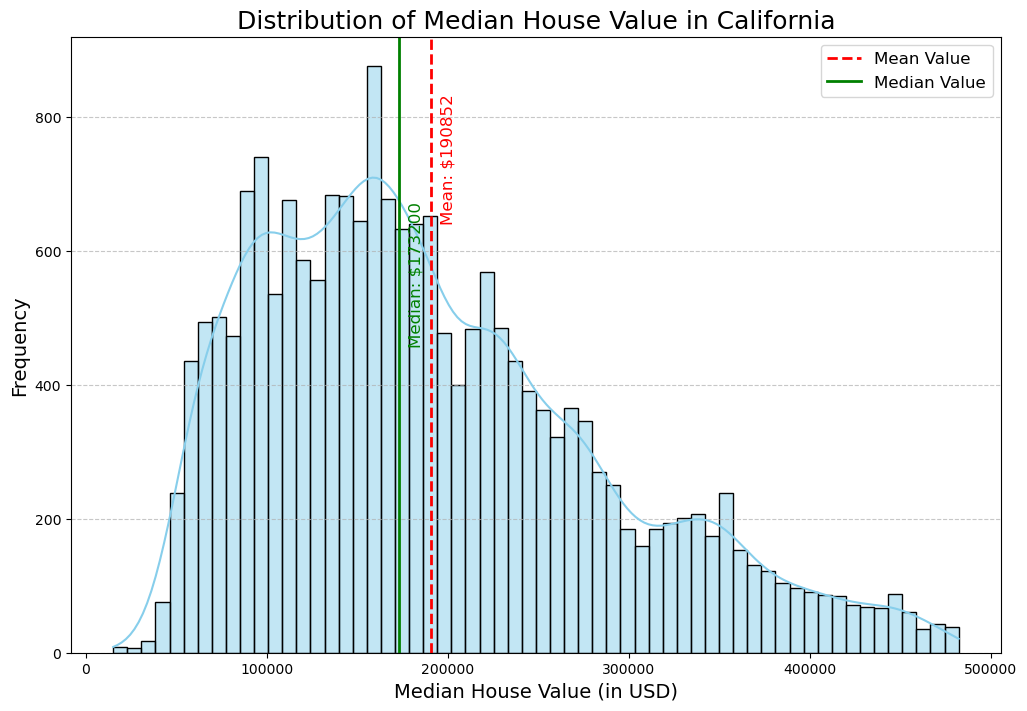

In [162]:
plt.figure(figsize=(12, 8))
# Plotting the histogram of 'median_house_value' with more bins for granularity
sns.histplot(data['median_house_value'], kde=True, color='skyblue', bins=60)

# Adding vertical lines to show mean and median values for better insight
plt.axvline(x=data['median_house_value'].mean(), color='red', linestyle='--', linewidth=2, label='Mean Value')
plt.axvline(x=data['median_house_value'].median(), color='green', linestyle='-', linewidth=2, label='Median Value')
plt.title('Distribution of Median House Value in California', fontsize=18)
plt.xlabel('Median House Value (in USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
mean_value = data['median_house_value'].mean()
median_value = data['median_house_value'].median()
plt.text(mean_value + 5000, plt.ylim()[1] * 0.7, f'Mean: ${mean_value:.0f}', color='red', fontsize=12, rotation=90)
plt.text(median_value + 5000, plt.ylim()[1] * 0.5, f'Median: ${median_value:.0f}', color='green', fontsize=12, rotation=90)
plt.show()

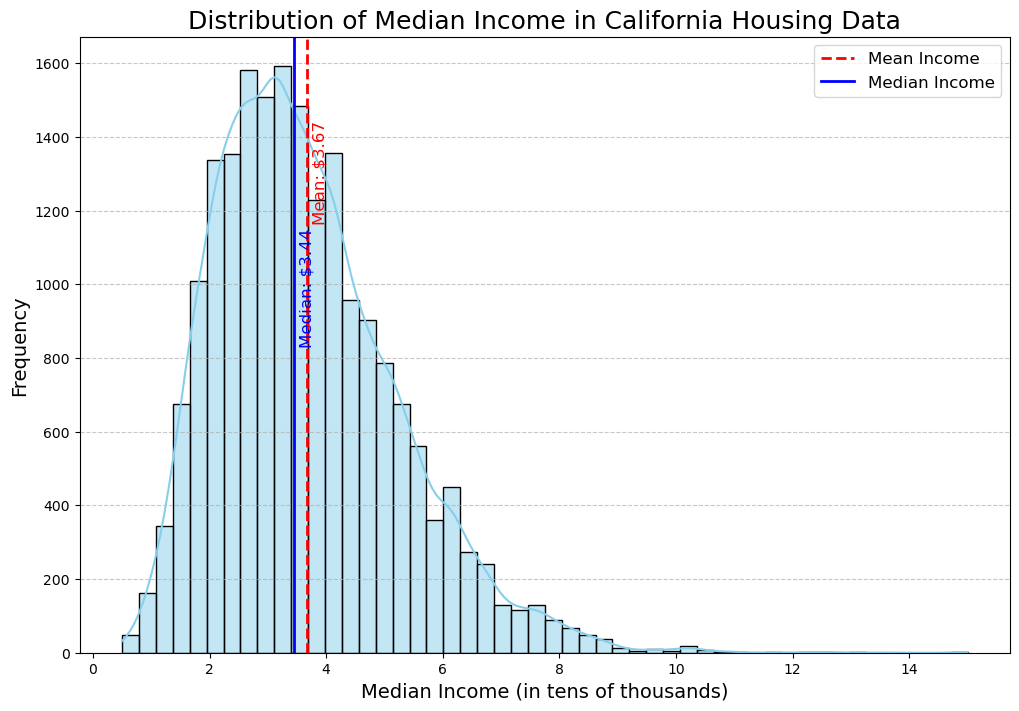

In [163]:
# Distribution of Median Income Visualization
plt.figure(figsize=(12, 8))
sns.histplot(data['median_income'], kde=True, color='skyblue', bins=50)

# Adding vertical lines for the mean and median income for better insight
plt.axvline(x=data['median_income'].mean(), color='red', linestyle='--', linewidth=2, label='Mean Income')
plt.axvline(x=data['median_income'].median(), color='blue', linestyle='-', linewidth=2, label='Median Income')
plt.title('Distribution of Median Income in California Housing Data', fontsize=18)
plt.xlabel('Median Income (in tens of thousands)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the mean and median values
mean_income = data['median_income'].mean()
median_income = data['median_income'].median()
plt.text(mean_income + 0.1, plt.ylim()[1] * 0.7, f'Mean: ${mean_income:.2f}', color='red', fontsize=12, rotation=90)
plt.text(median_income + 0.1, plt.ylim()[1] * 0.5, f'Median: ${median_income:.2f}', color='blue', fontsize=12, rotation=90)
plt.show()


<a id='relationship'></a>
### 2. **Relationship Analysis**

The Relationship Analysis explores how different features, such as median income and geographic location, correlate with median house value, providing insights into key factors that influence housing prices in the dataset.
    1. Scatter Plot: Median Income vs. Median House Value
    1. Scatter Plot: Latitude and Longitude vs. Median House Value 

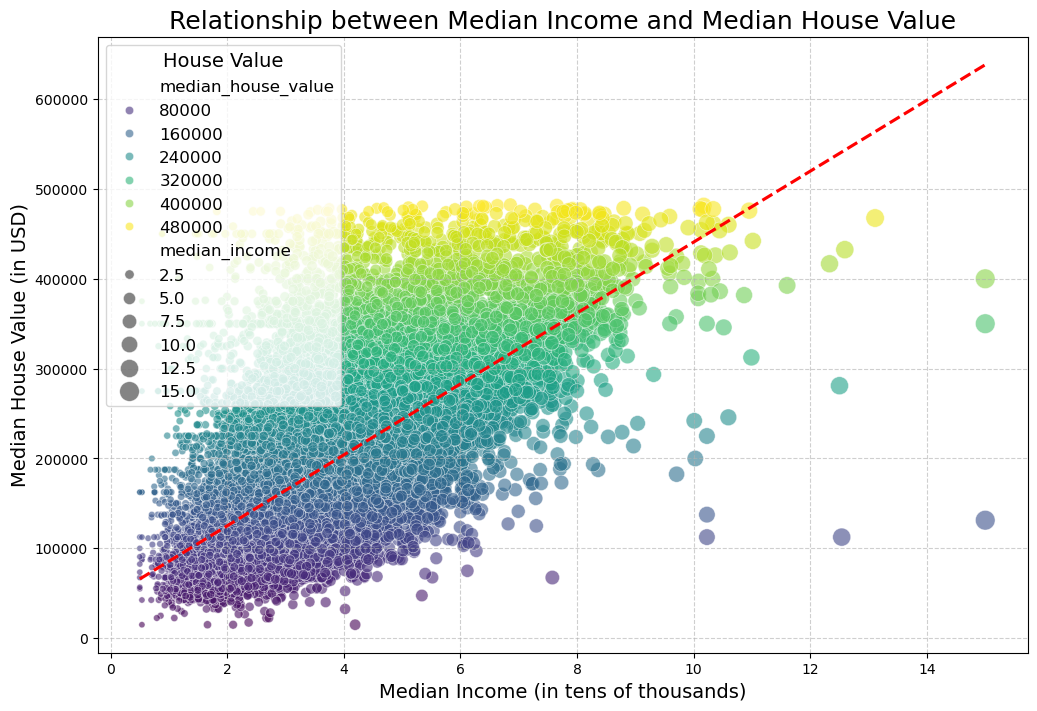

In [164]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='median_income', y='median_house_value', data=data, alpha=0.6,
                hue='median_house_value', size='median_income', palette='viridis', sizes=(20, 200))

# Adding a regression line for better insight into the trend
sns.regplot(x='median_income', y='median_house_value', data=data, scatter=False, color='red', line_kws={'linestyle':'--'}, ci=None)
plt.title('Relationship between Median Income and Median House Value', fontsize=18)
plt.xlabel('Median Income (in tens of thousands)', fontsize=14)
plt.ylabel('Median House Value (in USD)', fontsize=14)
plt.legend(title='House Value', loc='upper left', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

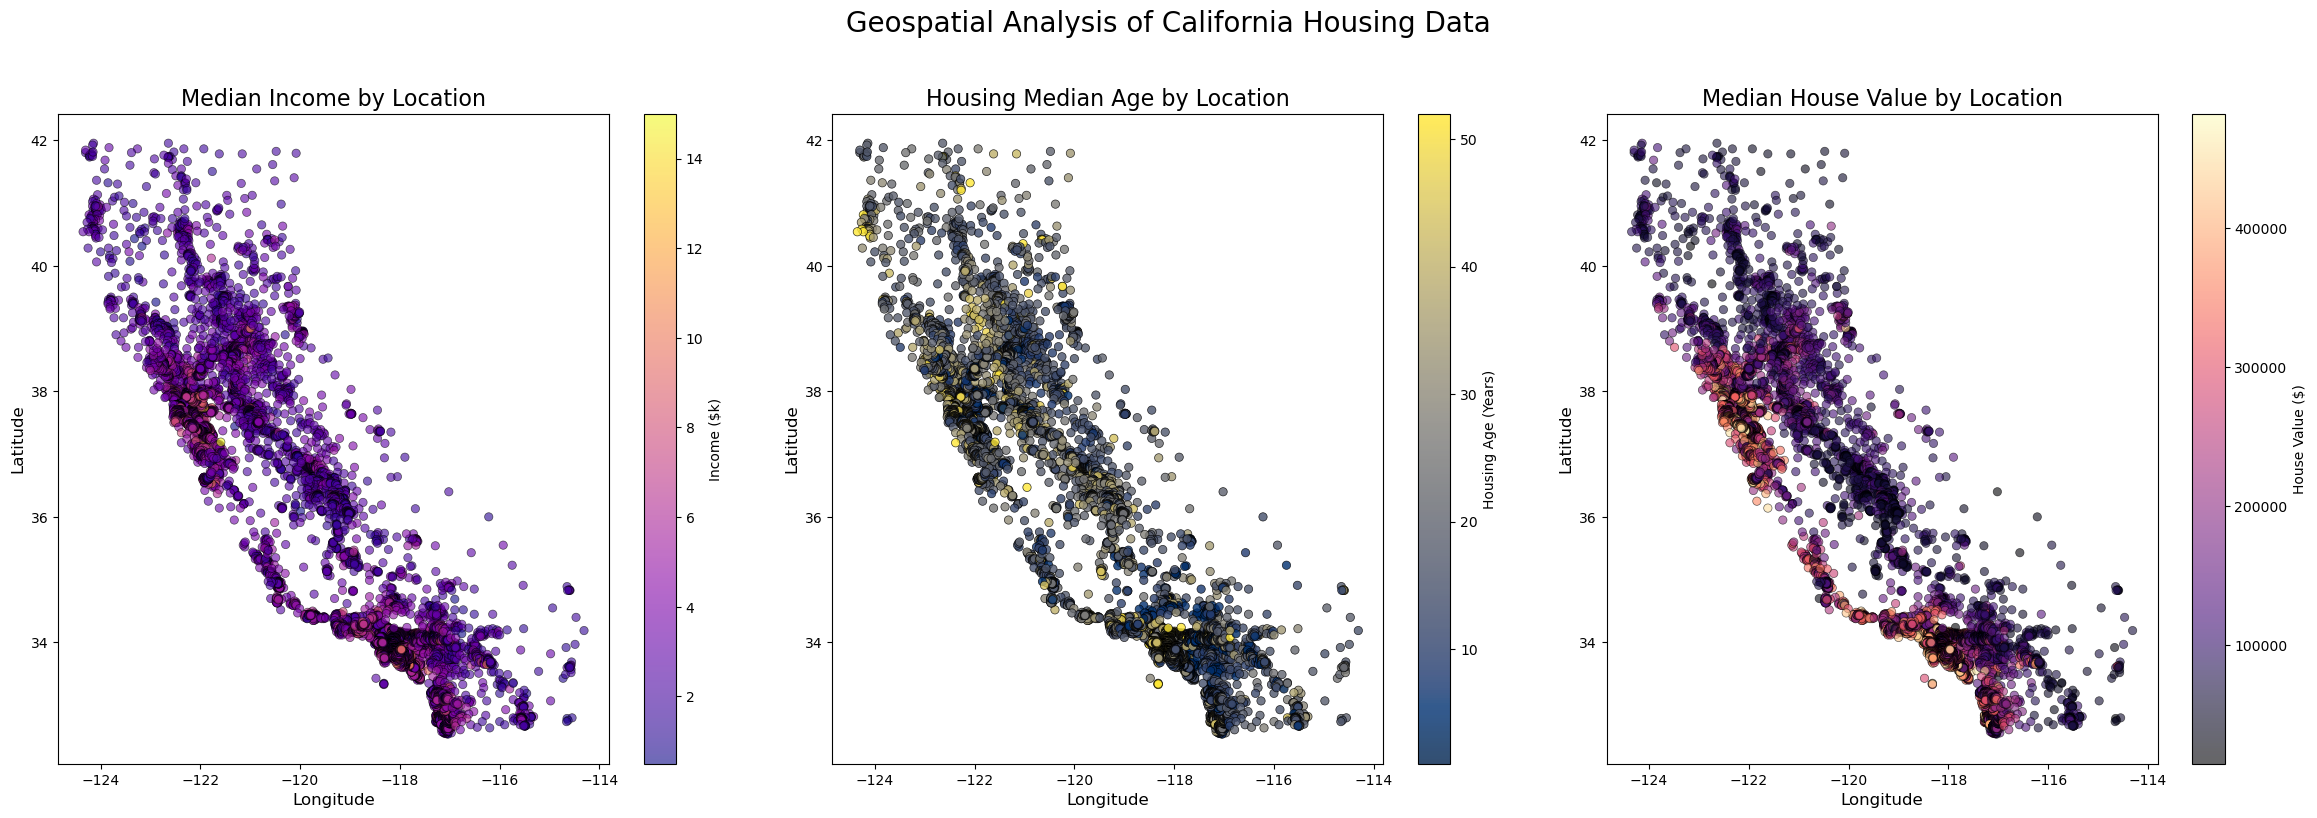

In [165]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Plot 1: Median Income by Location
scatter1 = axs[0].scatter(data['longitude'], data['latitude'], c=data['median_income'], cmap='plasma', alpha=0.6, edgecolor='k', linewidth=0.5)
axs[0].set_xlabel('Longitude', fontsize=12)
axs[0].set_ylabel('Latitude', fontsize=12)
axs[0].set_title('Median Income by Location', fontsize=16)
fig.colorbar(scatter1, ax=axs[0], label='Income ($k)')

# Plot 2: Housing Median Age by Location
scatter2 = axs[1].scatter(data['longitude'], data['latitude'], c=data['housing_median_age'], cmap='cividis', alpha=0.8, edgecolor='k', linewidth=0.5)
axs[1].set_xlabel('Longitude', fontsize=12)
axs[1].set_ylabel('Latitude', fontsize=12)
axs[1].set_title('Housing Median Age by Location', fontsize=16)
fig.colorbar(scatter2, ax=axs[1], label='Housing Age (Years)')

# Plot 3: Median House Value by Location
scatter3 = axs[2].scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='magma', alpha=0.6, edgecolor='k', linewidth=0.5)
axs[2].set_xlabel('Longitude', fontsize=12)
axs[2].set_ylabel('Latitude', fontsize=12)
axs[2].set_title('Median House Value by Location', fontsize=16)
fig.colorbar(scatter3, ax=axs[2], label='House Value ($)')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.92)
fig.suptitle('Geospatial Analysis of California Housing Data', fontsize=20, y=1.05)
plt.show()


# Creating a map centered around California
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=4)
df_map = data[['latitude', 'longitude']]
heatmap_data = [[row['latitude'], row['longitude']] for index, row in df_map.iterrows()]
HeatMap(
    heatmap_data,
    radius=15,
    blur=10,
    max_zoom=1,
    min_opacity=0.3,
).add_to(california_map)
california_map


<a id='correlation'></a>
### 3. **Correlation Analysis**

Correlation analysis identifies the strength of linear relationships between numerical features in the dataset, highlighting which variables are most closely associated with median house value and helping to detect potential multicollinearity.

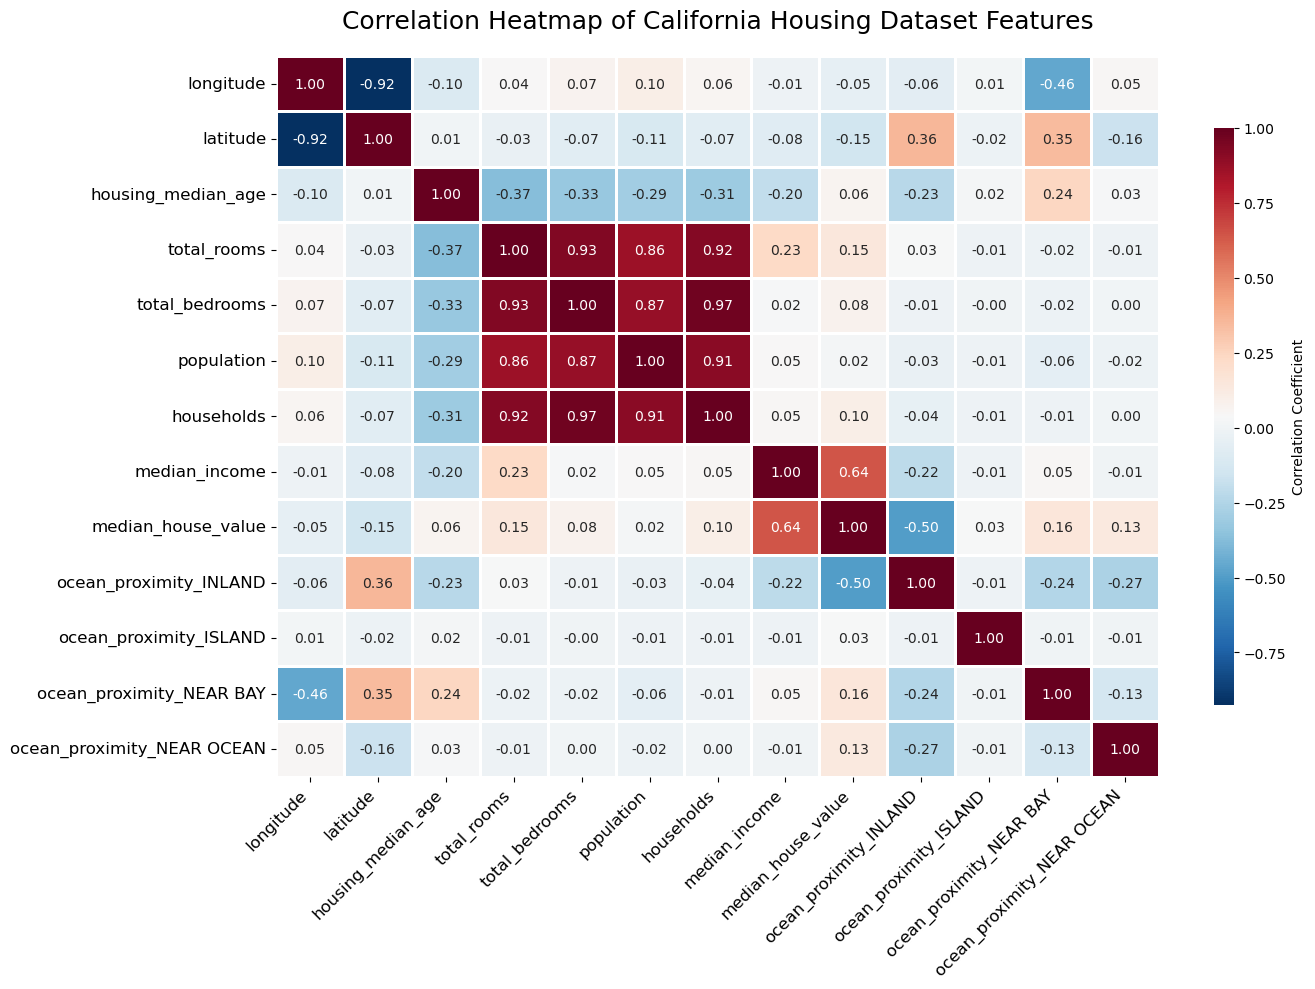

In [166]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap='RdBu_r', # Reversed Red-Blue colormap to highlight both positive and negative correlations distinctly
    linewidths=1, 
    linecolor='white',
    annot_kws={'size': 10},
    fmt=".2f", 
    cbar_kws={'shrink': 0.8, 'aspect': 30, 'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of California Housing Dataset Features', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

<a id='boxplot'></a>
### 4. **Box Plot Analysis**

Box Plot Analysis provides a visual summary of how median house values vary across different categories, such as ocean proximity, helping to identify differences and patterns in housing prices across categorical groups in the dataset.

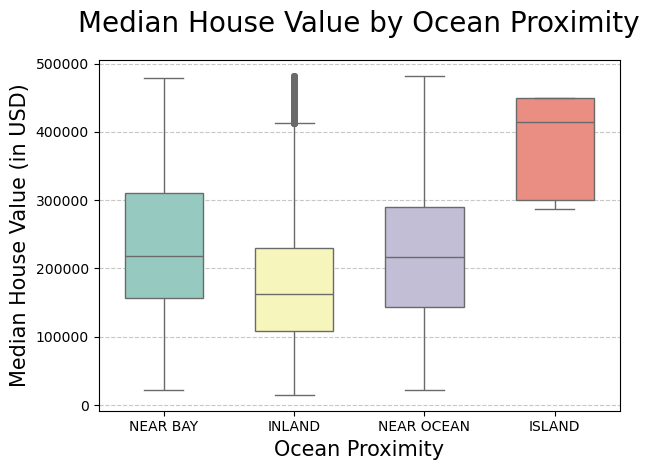

In [167]:
data['ocean_proximity'] = data[['ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']].idxmax(axis=1).str.replace('ocean_proximity_', '')
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data, hue='ocean_proximity', palette='Set3', width=0.6, fliersize=4, legend=False)
plt.title('Median House Value by Ocean Proximity', fontsize=20, pad=20)
plt.xlabel('Ocean Proximity', fontsize=15)
plt.ylabel('Median House Value (in USD)', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<a id='pairplot'></a>
### 5. **Pair Plot Analysis**

The Pair Plot provides a visual overview of pairwise relationships between selected features, helping to identify trends, correlations, and potential interactions in the dataset.

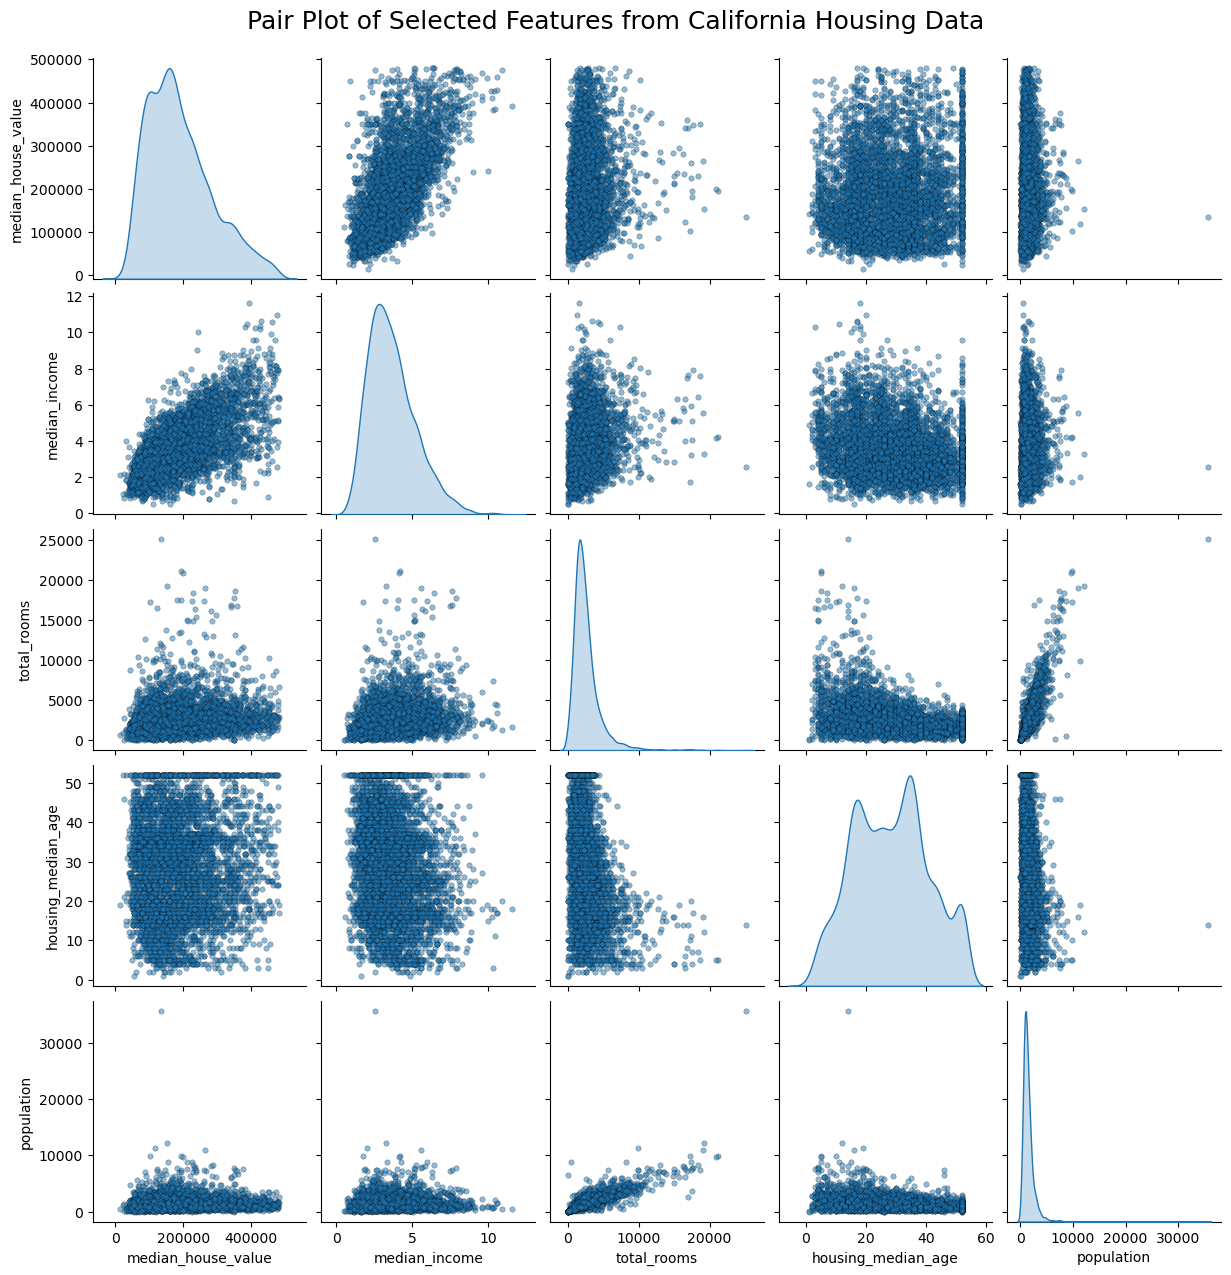

In [168]:
selected_features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'population']
# Sampling the data for better readability and performance
sampled_data = data[selected_features].sample(5000, random_state=42)
sns.pairplot(sampled_data, diag_kind='kde', kind='scatter', 
             plot_kws={'alpha': 0.5, 's': 15, 'edgecolor': 'k'}, diag_kws={'fill': True})
plt.suptitle('Pair Plot of Selected Features from California Housing Data', y=1.02, fontsize=18)
plt.show()


<a id='edasummary'></a>
### 6. **Exploratory Data Analysis Summary**

1. **Distribution Analysis**: 
    - Median House Value: The distribution is right-skewed, with most houses priced below $300,000. The mean value is slightly higher than the median, showing the influence of higher-priced houses.
    - Median Income: The median income distribution is also right-skewed, with the majority of households earning between $2,000 and $5,000 (in tens of thousands), indicating some high-income households skewing the average.
1. **Relationship Analysis**:
    - Median Income vs. Median House Value: The scatter plot shows a clear positive relationship between income and house value. Higher income tends to lead to higher house values, as demonstrated by a distinct upward trend in the plot.
    - Geospatial Relationship: House values and incomes are significantly higher near the coast, particularly in areas like Los Angeles and the Bay Area, emphasizing the importance of location in determining house prices.
1. **Correlation Heatmap**:
    - The correlation heatmap shows that median income has a strong positive correlation with median house value (0.64). Other features such as total rooms, population, and households exhibit strong internal correlations but have limited predictive power for housing prices.
1. **Box Plot Analysis by Ocean Proximity**:
    - The box plot of median house value by ocean proximity shows that properties ISLAND, NEAR BAY, and NEAR OCEAN have much higher median values compared to INLAND properties. The coastal proximity of properties significantly increases their value.
1. **Pair Plot Analysis**:
    - The pair plot reveals a strong positive correlation between median income and median house value, whereas relationships between other features like total rooms and median house value are less distinct. The distributions on the diagonal further confirm the skewness seen in earlier analyses.
1. **Heatmap**:
    - The heatmap provided an interactive visualization of house values across California. Hotspots of high median house values were observed along the coast, particularly near the Bay Area and Southern California. This visualization provided an intuitive understanding of how geography impacts housing prices, reinforcing the importance of location.

<a id='edaconclusion'></a>
### 7. **Exploratory Data Analysis Conclusion**

- Income is the strongest predictor of housing price, with clear positive correlations visible in both scatter plots and the correlation heatmap.
- Geography has a significant impact on house prices, with properties in coastal areas being far more valuable compared to inland ones. The Folium heatmap and geographic scatter plots emphasize this geographic trend.
- Ocean Proximity is a strong determinant of property prices. Homes closer to the coast or near bays and oceans are consistently higher in value than those located inland.
- Distributions of Income and Housing Prices show that both are right-skewed, with the presence of high-income households and expensive properties increasing the average beyond the median.

<a id='modelselection'></a>
## Model Selection:
---

The goal of the Model Selection phase is to identify the best predictive model for estimating median house value based on features like median income, location, and other characteristics of California housing data. Model selection is a critical step in machine learning where compare the performance of different models to determine which one fits the data best while maintaining a good balance between bias and variance.

Multiple regression models will be tested to determine their predictive power:

1. **Linear Regression**: This model helps to establish a linear relationship between features like median income and median house value. It is simple, interpretable, and a good baseline for understanding the relationships in the data.

1. **Ridge and Lasso Regression**: These are forms of regularized linear regression that help control overfitting. Ridge Regression adds a penalty for the magnitude of coefficients to make the model more robust, while Lasso Regression performs feature selection by driving some feature coefficients to zero.

1. **Polynomial Regression**: This model captures the non-linear relationship between median income and median house value, allowing us to model complex data patterns that may not fit a straight line.

1. **Random Forest Regression**: This is an ensemble model that builds multiple decision trees and averages their predictions. Random Forest helps capture complex interactions between features and is useful for handling large datasets.

<a id='modelselectioncriteria'></a>
#### **Model Selection Criteria**: 

Each model will be evaluated based on performance metrics such as:

- **R-Squared (R²)**: This metric measures the proportion of variance in the target variable that is explained by the features. A higher R² value indicates a better fit.
- **Mean Squared Error (MSE)**: MSE measures the average squared difference between actual and predicted values, providing an idea of how accurate the model is.
- **Mean Absolute Error (MAE)**: This metric captures the average difference between actual and predicted values, offering a direct interpretation of prediction accuracy.

By comparing these metrics across different models, the aim is to find a balance between underfitting and overfitting, thereby selecting the model that best generalizes to unseen data.

<a id='modelselectionplanned'></a>
#### **Planned Models for Selection**:
1. Linear Regression (Median House Value using Median Income)
1. Linear Regression (Using Longitude and Latitude to predict house prices based on location)
1. Multiple Linear Regression (Using Median Income, Total Rooms, Population)
1. Ridge Regression (Using Median Income)
1. Lasso Regression (Using Median Income)
1. Polynomial Regression (Using Median Income)
1. Random Forest Regression (Using Median Income)

<a id='modelselectionsteps'></a>
#### **Steps for Model Selection**:
1. **Data Preparation**: Splitting the data into training and testing sets for model evaluation.
1. **Model Implementation**: Implementing each regression model, starting with Linear Regression.
1. **Model Evaluation**: Evaluating models using metrics like R-Squared, MSE, and MAE.

<a id='modelanalysis'></a>
## Model Analysis:
---

In the Model Analysis phase, each of the trained models will be assessed based on their predictive performance, error metrics, and ability to generalize to unseen data. This involves evaluating the metrics of **R-Squared (R²)**, **Mean Squared Error (MSE)**, and **Mean Absolute Error (MAE)**. Additionally, model behavior, residual analysis, and robustness checks will be considered to determine the best-performing model among those used.

<a id='modelcriteria'></a>
#### **Model Analysis Criteria**:
- Performance Metrics:
    - **R-Squared (R²)**: Represents the proportion of variance explained by the model. Higher R² indicates better predictive power.
    - **Mean Squared Error (MSE)**: Measures the average squared error between predictions and actual values, indicating how well the model is performing.
    - **Mean Absolute Error (MAE)**: Captures the average magnitude of prediction errors without considering their direction, providing an overall error value in the original units.
- Model Complexity: 
    - Assessing whether adding complexity improves the model's performance significantly or if it leads to overfitting.
    - Ridge and Lasso Regression are regularized models that help in mitigating overfitting and feature importance, while Polynomial Regression and Random Forest Regression account for potential non-linear relationships.
- Residual Analysis:
    - Analyzing residuals for patterns that may indicate model biases or misspecifications.
    - Homogeneity of Variance: Residuals should have constant variance.
    - Normality: Residuals should be normally distributed.

<a id='sampling'></a>
#### **Sampling**: 

Sampling in machine learning involves splitting data into a training set for model learning and a testing set for evaluation. This approach helps assess the model's performance on unseen data, providing an estimate of its accuracy and generalization ability.
1. **Train-Test Split**: The dataset is divided into training and testing sets, typically with an 80-20 ratio, to allow the model to learn from a subset (training data) and evaluate its performance on unseen data (test data). This approach helps assess the model's generalization ability.
1. **Random Sampling**: A random seed (like random_state=42) ensures that the sampling is reproducible, meaning the same train-test split can be achieved each time, which is useful for consistent results and comparisons across different model runs.

In [169]:
sample_test_size = 0.8
sample_random_state = 42

<a id='linear1'></a>
### 1. **Linear Regression (Median House Value using Median Income)**

This model predicts the median house value based on median income, establishing a simple linear relationship to understand how income influences housing prices.

Mean Squared Error (MSE): 5343476505.10899
R-Squared (R²): 0.41323493462839445
Mean Absolute Error (MAE): 56169.158077768334


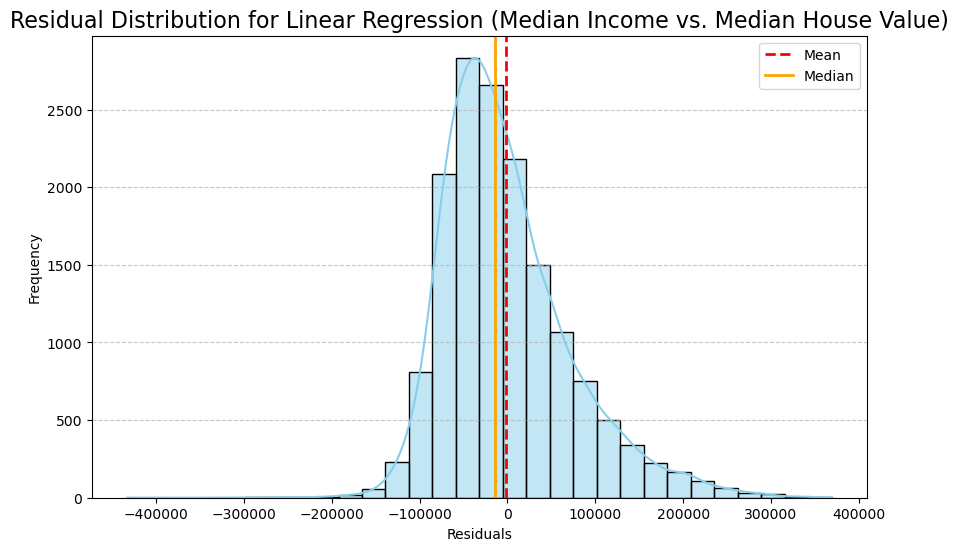

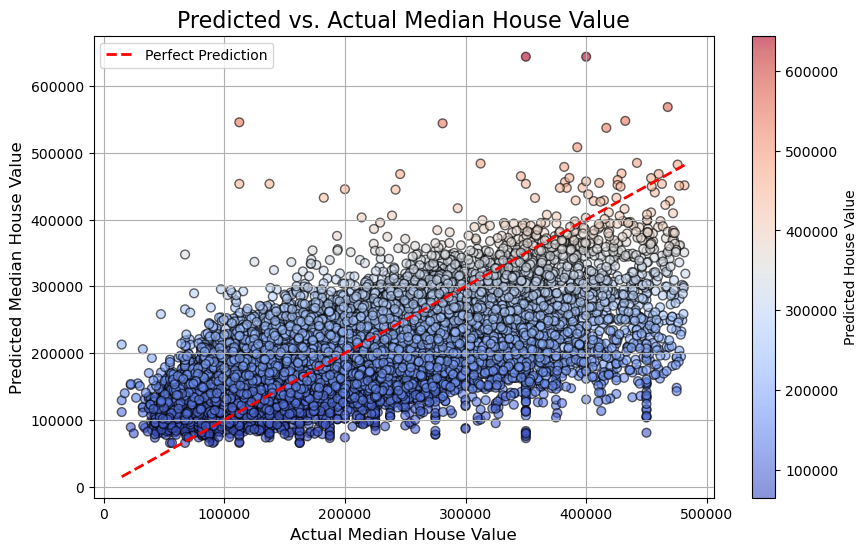

In [170]:
# Selecting the feature and target for the first model: Predicting Median House Value using Median Income
X = data[['median_income']]
y = data['median_house_value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sample_test_size, random_state=sample_random_state)

# Creating and training the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = linear_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Displaying the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)

# Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Residual Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue', bins=30)

# Adding vertical lines for mean and median
plt.axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(residuals.median(), color='orange', linestyle='-', linewidth=2, label='Median')

plt.title('Residual Distribution for Linear Regression (Median Income vs. Median House Value)', fontsize=16)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.figure(figsize=(10, 6))

sc = plt.scatter(y_test, y_pred, alpha=0.6, c=y_pred, cmap='coolwarm', edgecolor='k', s=40)

# Line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Median House Value', fontsize=12)
plt.ylabel('Predicted Median House Value', fontsize=12)
plt.title('Predicted vs. Actual Median House Value', fontsize=16)
plt.colorbar(sc, label='Predicted House Value')
plt.grid(True)
plt.legend()
plt.show()

**Interpretation**: The Linear Regression model, using median income to predict median house value, yields the following insights:
- **$MSE$** of approximately 5.34 billion indicates large prediction errors, particularly for high-value homes.
- **$R^2$** of 0.413 shows that median income explains about 43.4% of the variance in median house values, suggesting that additional features are needed to improve predictive power.
- **$MAE$** of $55,169 reflects significant average prediction errors, indicating that the model’s accuracy may be insufficient for precise pricing predictions.

**Chart Analysis**:
- **Residual Distribution**: Residuals are centered around zero but show a slight skew, with larger errors in high-value predictions.
- **Predicted vs. Actual Scatter**: While there is a positive trend, deviations from the perfect prediction line, especially at high values, highlight limitations in using a single feature.

<a id='linear2'></a>
### 2. **Linear Regression (Using Longitude and Latitude to predict house prices based on location)**

This model predicts median house value based on geographical coordinates, aiming to capture the impact of location on housing prices.

Mean Squared Error (MSE): 6797335792.94014
R-Squared (R²): 0.2535872147872532
Mean Absolute Error (MAE): 64587.64109591635


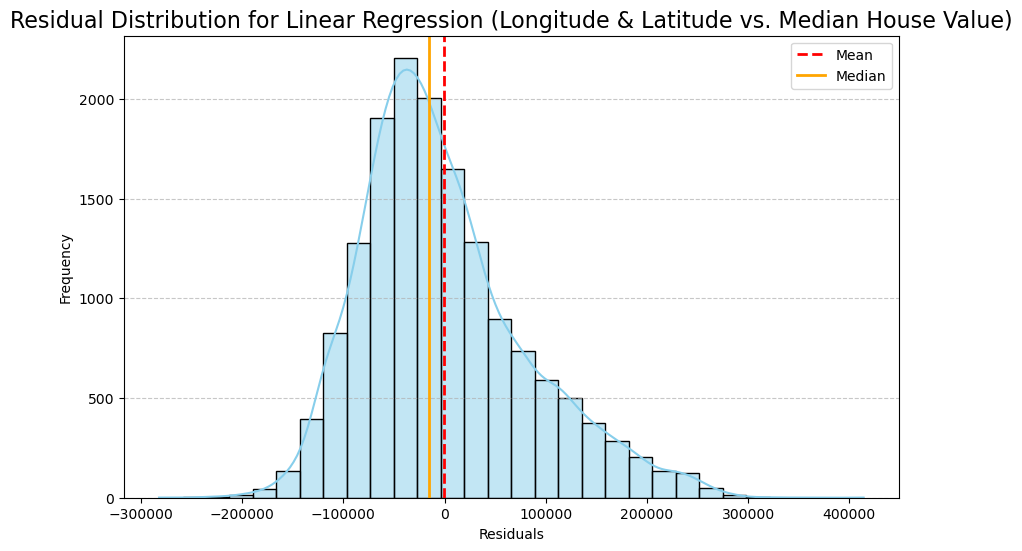

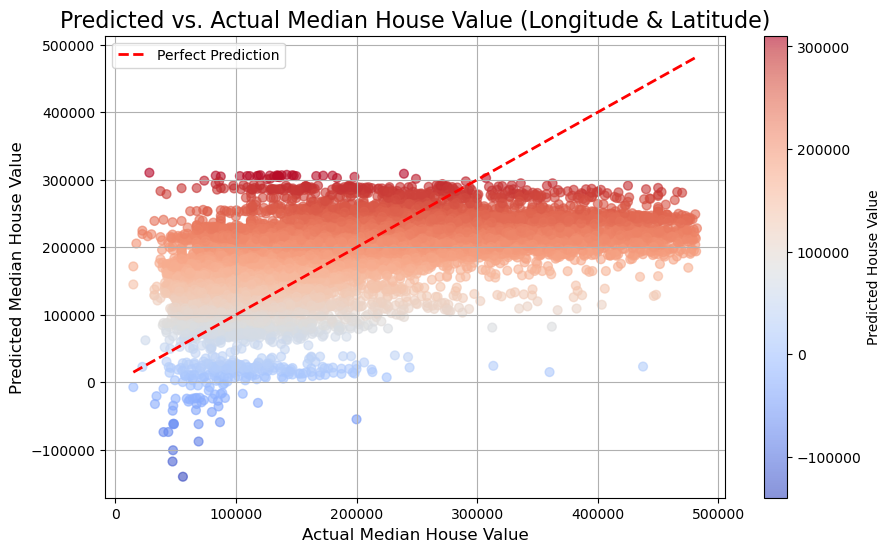

In [171]:
# Selecting features (longitude, latitude) and target (median house value)
X_loc = data[['longitude', 'latitude']]
y_loc = data['median_house_value']

# Splitting the dataset into training and testing sets
X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(X_loc, y_loc, test_size=sample_test_size, random_state=sample_random_state)

# Creating and training the Linear Regression model
linear_reg_loc = LinearRegression()
linear_reg_loc.fit(X_train_loc, y_train_loc)

# Making predictions on the testing set
y_pred_loc = linear_reg_loc.predict(X_test_loc)

# Evaluating the model
mse_loc = mean_squared_error(y_test_loc, y_pred_loc)
r2_loc = r2_score(y_test_loc, y_pred_loc)
mae_loc = mean_absolute_error(y_test_loc, y_pred_loc)

# Displaying the evaluation metrics
print("Mean Squared Error (MSE):", mse_loc)
print("R-Squared (R²):", r2_loc)
print("Mean Absolute Error (MAE):", mae_loc)

# Residual Analysis - Calculate residuals
residuals_loc = y_test_loc - y_pred_loc

# Residual Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals_loc, kde=True, color='skyblue', bins=30)

# Adding vertical lines for mean and median
plt.axvline(residuals_loc.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(residuals_loc.median(), color='orange', linestyle='-', linewidth=2, label='Median')

# Adding title, labels, legend, and grid
plt.title('Residual Distribution for Linear Regression (Longitude & Latitude vs. Median House Value)', fontsize=16)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Predicted vs. Actual Scatter Plot
plt.figure(figsize=(10, 6))

# Scatter plot with color gradient
sc = plt.scatter(y_test_loc, y_pred_loc, alpha=0.6, c=y_pred_loc, cmap='coolwarm', s=40)

# Line of perfect prediction
plt.plot([y_test_loc.min(), y_test_loc.max()], [y_test_loc.min(), y_test_loc.max()], 'r--', linewidth=2, label='Perfect Prediction')

# Adding title, labels, color bar, and grid
plt.xlabel('Actual Median House Value', fontsize=12)
plt.ylabel('Predicted Median House Value', fontsize=12)
plt.title('Predicted vs. Actual Median House Value (Longitude & Latitude)', fontsize=16)
plt.colorbar(sc, label='Predicted House Value')
plt.grid(True)
plt.legend()
plt.show()

# Folium Heatmap for Predicted Median House Values
# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude'], prediction] for row, prediction in zip(X_test_loc.to_dict('records'), y_pred_loc)]

# Create base map
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6, min_zoom=4)

# Add HeatMap layer
HeatMap(heat_data, radius=8, blur=15, max_zoom=13).add_to(california_map)

# Display the map
california_map

**Interpretation**: The Linear Regression model, using longitude and latitude to predict median house value, yields the following insights:
- **$MSE$** of approximately 6.80 billion indicates large prediction errors, particularly for homes in high-value locations, as location alone may not fully capture price determinants.
- **$R^2$** of 0.254 shows that longitude and latitude explain only about 25.4% of the variance in median house values, suggesting that additional features are essential for more accurate predictions.
- **$MAE$** of $64,588 reflects considerable average prediction errors, indicating limited precision in predicting housing prices based solely on location.

**Chart Analysis**:
- **Residual Distribution Plot**:
    - The residuals are centered around zero, indicating no strong overall bias. However, the distribution is broad, with substantial errors on both the positive and negative ends, reflecting inconsistent prediction accuracy.
    - The slight skew in the distribution and the long tails indicate that the model struggles with outliers, particularly with homes in higher or lower price ranges.
    - The mean and median residuals being close to zero confirm that the model does not have systematic bias but lacks precision due to missing influential predictors.

- **Predicted vs. Actual Scatter Plot**:
    - The scatter plot shows a weak positive trend, with points scattered widely around the line of perfect prediction. The large dispersion indicates that the model has substantial difficulty in accurately predicting housing prices.
    - The color gradient (from blue to red) represents predicted values, showing that higher predicted prices often deviate significantly from actual values, further highlighting the limitations of location-only predictors.
    - This scatter pattern suggests that latitude and longitude alone do not fully capture the variability in housing prices, as homes in similar geographic areas may still have vastly different prices due to factors not included in this model, such as house size, income levels, or neighborhood characteristics.

- **Heatmap**:
    - The heatmap shows areas of higher predicted house prices, with concentrations around major cities like Los Angeles, San Francisco, and San Diego. These areas show intense heat, indicating the model's higher predicted values in urban centers.
    - While the heatmap provides a useful geographical representation, it cannot account for finer details that might affect house prices within these areas, such as neighborhood quality or property features, which further limits the accuracy of predictions based solely on location.

<a id='multiple'></a>
### 3. **Multiple Linear Regression (Using Median Income, Total Rooms, Population)**

This model predicts the median house value based on median income, total rooms, and population, establishing a linear relationship to understand how these features collectively influence housing prices.

**Interpretation**: 

**Chart Analysis**:

<a id='ridge'></a>
### 4. **Ridge Regression (Using Median Income)**

This model predicts the median house value based on median income, using Ridge Regression to apply regularization. This approach penalizes large coefficients, reducing overfitting and improving the model's generalization by controlling the impact of outliers or noise in the data.

**Interpretation**: 

**Chart Analysis**:

<a id='lasso'></a>
### 5. **Lasso Regression (Using Median Income)**

This model predicts the median house value based on median income, using Lasso Regression to apply regularization. Lasso Regression not only reduces overfitting by penalizing large coefficients but also performs feature selection by driving some coefficients to zero, thus simplifying the model and enhancing interpretability.

**Interpretation**: 

**Chart Analysis**:

<a id='polynomial'></a>
### 6. **Polynomial Regression (Using Median Income)**

This model predicts the median house value based on median income by fitting a polynomial relationship, allowing for the capture of non-linear patterns in the data. By transforming the linear model into a polynomial one, this approach better models the complex relationship between income and housing prices, potentially improving prediction accuracy.

Mean Squared Error (MSE): 5337712881.794294
R-Squared (R²): 0.4138678358506215
Mean Absolute Error (MAE): 56211.19088596426


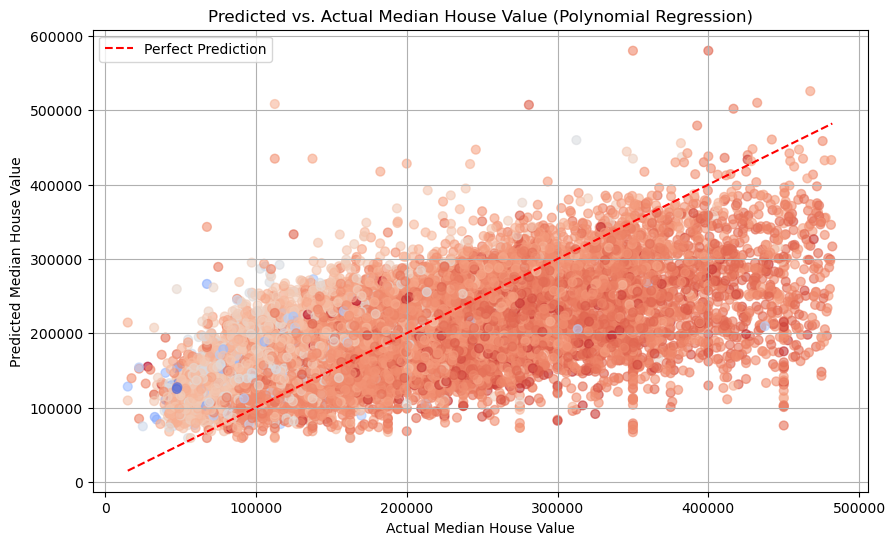

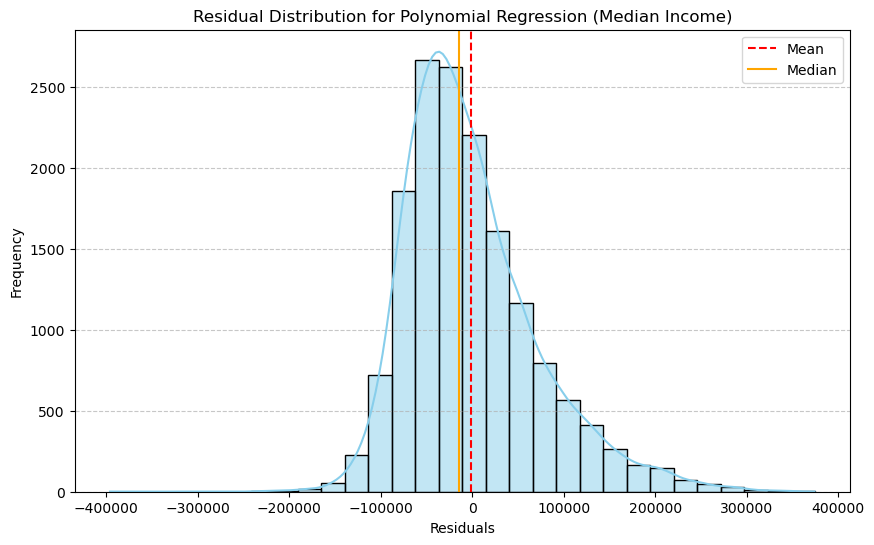

In [172]:
# Selecting the feature and target for the model
X_poly = data[['median_income']]
y_poly = data['median_house_value']

# Transforming the feature into polynomial features
poly_transformer = PolynomialFeatures(degree=2)  # Degree can be adjusted
X_poly_transformed = poly_transformer.fit_transform(X_poly)

# Splitting the dataset into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_transformed, y_poly, test_size=sample_test_size, random_state=sample_random_state)

# Creating and training the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)

# Making predictions on the testing set
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluating the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)

# Displaying the evaluation metrics
print("Mean Squared Error (MSE):", mse_poly)
print("R-Squared (R²):", r2_poly)
print("Mean Absolute Error (MAE):", mae_poly)

# Visual Analysis
# Plotting Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
sc = plt.scatter(y_test_poly, y_pred_poly, alpha=0.6, c=y_pred_loc, cmap='coolwarm', s=40)
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs. Actual Median House Value (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Residual Analysis
residuals_poly = y_test_poly - y_pred_poly

plt.figure(figsize=(10, 6))
sns.histplot(residuals_poly, kde=True, color='skyblue', bins=30)
plt.axvline(residuals_poly.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(residuals_poly.median(), color='orange', label='Median')
plt.title('Residual Distribution for Polynomial Regression (Median Income)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretation**: The Linear Regression model, using longitude and latitude to predict median house value, yields the following insights:
- **$MSE$** of 5.34 billion – Indicates significant prediction errors, especially at higher house values.
- **$R^2$** of 0.414 explains 41.4% of price variance, suggesting moderate accuracy.
- **$MAE$** of $56,211 explains average deviation shows moderate prediction accuracy.

**Chart Analysis**:
- **Residual Distribution Plot**:
    - Residuals are centered around zero, showing no strong bias. Slight skew and long tails indicate errors, particularly for outliers.
    - Mean and median close to zero confirm balanced prediction errors.
- **Predicted vs. Actual Scatter Plot**:
    - Positive trend but notable deviations from the perfect prediction line, especially for high values, show limitations.
    - Dense clustering at lower values indicates better accuracy for mid-range prices, with increased errors at higher values.

<a id='randomforest'></a>
### 7. **Random Forest Regression (Using Median Income)**

This model predicts the median house value based on median income using Random Forest Regression, an ensemble method that builds multiple decision trees and averages their predictions. By capturing complex, non-linear relationships and reducing overfitting through averaging, Random Forest improves prediction accuracy and robustness compared to single linear models.

Random Forest Model Evaluation Metrics:
Mean Squared Error (MSE): 7434403976.744613
R-Squared (R²): 0.18363100665968002
Mean Absolute Error (MAE): 65734.07359585067
Feature Importance (Median Income): 1.0


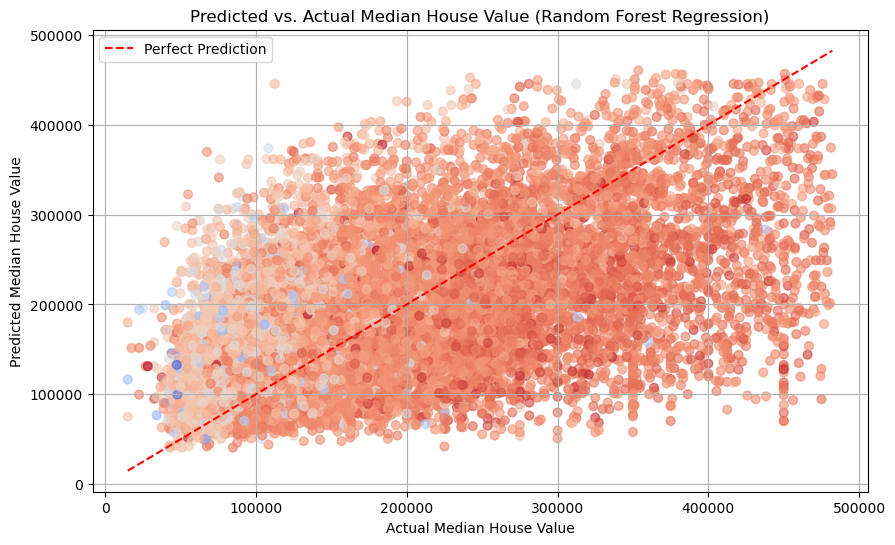

In [173]:
# Selecting the feature and target for the model
X_rf = data[['median_income']]
y_rf = data['median_house_value']

# Splitting the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=sample_test_size, random_state=sample_random_state)

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=sample_random_state)
rf_regressor.fit(X_train_rf, y_train_rf)

# Making predictions on the testing set
y_pred_rf = rf_regressor.predict(X_test_rf)

# Evaluating the model
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)

print("Random Forest Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-Squared (R²):", r2_rf)
print("Mean Absolute Error (MAE):", mae_rf)

# Feature Importance (with a single feature, this will show how important median income is in the model)
importances = rf_regressor.feature_importances_
print("Feature Importance (Median Income):", importances[0])

# Visualize Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.6, c=y_pred_loc, cmap='coolwarm', s=40)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs. Actual Median House Value (Random Forest Regression)')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation**: The Linear Regression model, using longitude and latitude to predict median house value, yields the following insights:
- **$MSE$** of 7.43 billion – This high MSE indicates substantial prediction errors, suggesting that median income alone may not be sufficient for accurately predicting house prices, even with a non-linear model like Random Forest.
- **$R^2$** of 0.184 – The model explains only 18.4% of the variance in median house values, indicating limited predictive power. Additional features would likely improve model performance significantly.
- **$MAE$** of $65,734 – On average, the model’s predictions deviate from actual values by around $65,734, reflecting moderate to high prediction errors.
- **Feature Importance (Median Income)**: 1.0 – Since median income is the sole feature, it has full importance in the model, though it clearly does not capture all the necessary information to accurately predict housing prices.

**Chart Analysis**:
- **Predicted vs. Actual Scatter Plot**:
    - **Positive Correlation**: There is a positive correlation between actual and predicted values, suggesting that median income does have some impact on median house value. However, this relationship is weak, as reflected by the high dispersion around the perfect prediction line.
    - **Deviation from Perfect Prediction**: Many points deviate significantly from the red dashed line (perfect prediction line), indicating that the model struggles to capture the variability in house prices accurately. The spread of points around the line highlights the model’s limited accuracy with a single feature.
    - **Density of Points**: The points are widely scattered, particularly for higher house values, indicating that the model’s performance worsens with increasing house prices. This suggests that income alone is insufficient to predict prices accurately, as other influential factors are missing.

<a id='comparative'></a>
## Comparative Analysis:
---

<a id='hypothesis'></a>
## Hypothesis Validation and testing:
---

<a id='conclusion'></a>
## Conclusion:
---

<a id='references'></a>
## References:
---